In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv("../Data_Scrape/Dataset/updated_dataset.csv")

In [3]:
df.head()

,sp_song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,lda_topic_11,lda_topic_12,lda_topic_13,lda_topic_14,lda_topic_15,lda_topic_16,lda_topic_17,lda_topic_18,lda_topic_19,Playlists
0,6edQfeOlqbGteYixpJl3Sm,0.857,0.602,10,-8.311,1,0.0290,0.489000,0.02440,0.3170,...,0.0,0.022993,0.000000,0.122078,0.0,0.000000,0.000000,0.081108,0.386042,[165]
1,5Oe7wHPL4hdEXeF4AOayCi,0.322,0.990,8,-1.785,1,0.1710,0.000044,0.41700,0.0366,...,0.0,0.000000,0.163142,0.022999,0.0,0.144614,0.187207,0.000000,0.000000,[79]
2,6i1uWZYWabNHq2wQnoca58,0.666,0.884,9,-5.243,0,0.0429,0.506000,0.00612,0.0408,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.582131,[15]
3,4BzBtS6PBreni5hNPo2hos,0.609,0.578,9,-7.081,1,0.0414,0.296000,0.00000,0.1500,...,0.0,0.000000,0.511716,0.084905,0.0,0.000000,0.000000,0.115004,0.108140,[168]
4,0GvhHQbWSnGltjl0je61dI,0.699,0.514,4,-12.610,1,0.0315,0.587000,0.02900,0.2200,...,0.0,0.000000,0.000000,0.401954,0.0,0.000000,0.000000,0.000000,0.000000,"[30, 133]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11159 entries, 0 to 11158
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sp_song_id        11159 non-null  object 
 1   danceability      11159 non-null  float64
 2   energy            11159 non-null  float64
 3   key               11159 non-null  int64  
 4   loudness          11159 non-null  float64
 5   mode              11159 non-null  int64  
 6   speechiness       11159 non-null  float64
 7   acousticness      11159 non-null  float64
 8   instrumentalness  11159 non-null  float64
 9   liveness          11159 non-null  float64
 10  valence           11159 non-null  float64
 11  tempo             11159 non-null  float64
 12  duration_ms       11159 non-null  int64  
 13  release_date      11159 non-null  int64  
 14  popularity        11159 non-null  int64  
 15  lda_topic_0       11159 non-null  float64
 16  lda_topic_1       11159 non-null  float6

In [5]:
# playlists_multi = [132, 123,19,46,60,68,79,125]  #132, 123,19,46,60,68,79,125
playlists_multi = [79, 100, 4, 35, 165, 108]  #132, 123,19,46,60,68,79,125

dict_playlists_to_songs = {}
data = np.array(df)
Dataset = []
for j in playlists_multi:
    l0 = []
    for i in df.index:
        l = eval(df["Playlists"][i])
        if(j in l):
            l.remove(j)
            flag = 0
            for k in playlists_multi:
                    if(k!=j and k in l):
                        flag = 1
            if(flag!=1):
                l0.append(df["sp_song_id"][i])
                Dataset.append(data[i])
                
    dict_playlists_to_songs[j] = l0
#     print(len(l0))
print(len(dict_playlists_to_songs))
Dataset = np.array(Dataset)
print(Dataset.shape)
np.random.shuffle(Dataset)
print(Dataset[0])



6
(1096, 36)
['1yg7fwwYmx9DQ2TdXUmfpJ' 0.7070000000000001 0.514 9 -8.885 0 0.0281 0.58
 0.00015900000000000002 0.0953 0.524 86.035 269840 1985 69 0.0 0.0
 0.03852353617548943 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.1352674663066864 0.0 0.0 0.5803613662719727 0.2344178110361099
 '[23, 115, 123, 132, 144, 145, 165]']


In [6]:
X = Dataset[:,1:-1]
Y = Dataset[:,-1]
# print(Y)
for i in range(len(Y)):
    Y[i] = eval(Y[i])
    for j in playlists_multi:
        if(j in Y[i]):
            Y[i] = j
            break
    
print(X.shape)
print(Y.shape)


# print(Y)

(1096, 34)
(1096,)


In [7]:
for i in range(len(Y)):
    for j in range(len(playlists_multi)):
#         print(playlists_multi[j])
        if playlists_multi[j] == Y[i]:
            Y[i] = j
            break
# for i in Y:
#     print(i)

In [8]:
# """ Do not run code"""

# X = []
# y = []
# playlist_selected = [57]
# c = 0
# for i in df.index:
#     features = df.columns[1:-1]
# #     print(features)
#     a = []
#     for feature in features:
#         a.append(df[feature][i])
#     playlists = eval(df['Playlists'][i])
#     flag = 0
#     for i in range(len(playlist_selected)):
#         if playlist_selected[i] in playlists:
#             c += 1
#             flag = 1
#     y.append(flag)
#     X.append(a)

In [9]:
# """ For binary class """

# X = []
# y = []
# playlist_selected = [57]
# c = 0
# for i in df.index:
#     features = df.columns[1:-1]
# #     print(features)
#     a = []
#     for feature in features:
#         a.append(df[feature][i])
#     playlists = eval(df['Playlists'][i])
#     flag = 0
#     for i in range(len(playlist_selected)):
#         if playlist_selected[i] in playlists:
#             c += 1
#             flag = 1
#     y.append(flag)
#     X.append(a)
# print(c)

In [10]:
X = np.array(X)
y = np.array(Y)
y = Y.reshape(-1, 1)
standardScalar = StandardScaler()
X = standardScalar.fit_transform(X)
print(X.shape, y.shape)
y = np.squeeze(y)
# print(X)
# print(y)

(1096, 34) (1096, 1)


In [11]:
y = y.astype("str")
# print(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# print(y_test[:1000])

logistic = LogisticRegression(solver = "saga", max_iter = 10000, multi_class = "multinomial")

logistic.fit(X_train, y_train)

test_score = logistic.score(X_test, y_test)

y_pred = logistic.predict(X_test)
pres_score = precision_score(y_test, y_pred, average = "weighted")

f1= f1_score(y_test, y_pred, average = "weighted")
recall_Score = recall_score(y_test, y_pred, average = "weighted")
print(test_score, pres_score, f1, recall_Score)
# print(y_pred)
print("\n\n")
# print(y_test)

# c_1_1 = 0
# c_1_0 = 0
# c_0_1 = 0
# for i in range(len(y_test)):
#     print( "(", y_test[i] , y_pred[i], ")", end = " ")
    
#     if y_test[i] == 1 and y_pred[i] == 1:
#         c_1_1 += 1
    
#     if y_test[i] == 1 and y_pred[i] == 0:
#         c_1_0 += 1
    
#     if y_test[i] == 0 and y_pred[i] == 1:
#         c_0_1 += 1

# print(c_1_1, c_1_0, c_0_1)
        

# y_pred_train = logistic.predict(X_train)
    
# for i in range(len(y_test)):
#     print( "(", y_test[i] , y_pred[i], ")", end = " ")

# c = 0
# for i in range(len(y_pred)):
#     if(y_pred[i] == y_test[i]):
#         c+=1
# print(c/len(y_pred))

0.8090909090909091 0.805291571173924 0.7991197563142289 0.8090909090909091





In [14]:
y_train = y_train.astype("int")


In [15]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 123)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X_train)
print(tsne_em)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 876 samples in 0.005s...
[t-SNE] Computed neighbors for 876 samples in 0.167s...
[t-SNE] Computed conditional probabilities for sample 876 / 876
[t-SNE] Mean sigma: 1.939282
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.635078
[t-SNE] KL divergence after 1000 iterations: 1.329890
[[-21.127853   -4.850242 ]
 [-23.659912  -16.302633 ]
 [-27.743488   -5.0502434]
 ...
 [ 23.350302   14.3625765]
 [ -4.9987407  11.170275 ]
 [ 34.56458    -3.9949522]]


In [18]:
df_tsne= pd.DataFrame(columns = ["x", "y", "label"] )
df_tsne["x"] = tsne_em[:,0]
df_tsne["y"] = tsne_em[:,1]
df_tsne["label"] = y_train

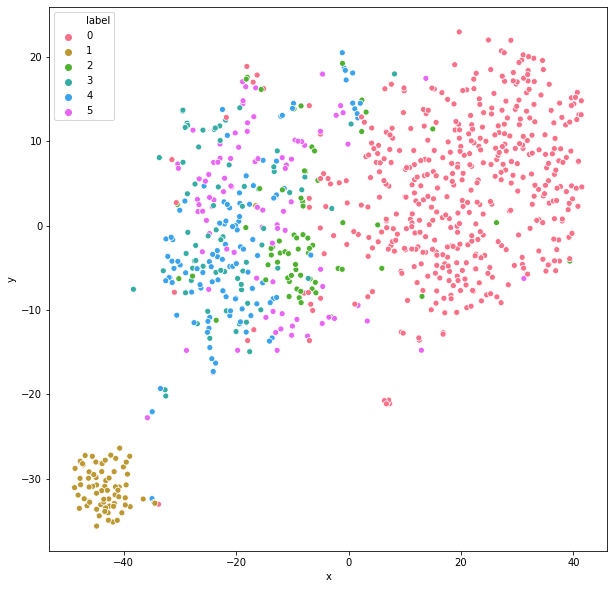

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
# plt.scatter(tsne_em[:,0], tsne_em[:,1],color = "green", hue = y_train);
sns.scatterplot(x = df_tsne["x"], y = df_tsne["y"], hue = df_tsne["label"],  palette = sns.color_palette("husl", len(set(y_train))))
plt.show()

In [20]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[1.59311294e-01 5.66535587e-02 4.70315494e-02 4.07921472e-02
 3.81052622e-02 3.76360659e-02 3.57387990e-02 3.42616631e-02
 3.26336857e-02 3.18850103e-02 3.14480766e-02 3.10289727e-02
 2.97392988e-02 2.92307994e-02 2.76864917e-02 2.66213915e-02
 2.62875517e-02 2.57138547e-02 2.46557496e-02 2.33994093e-02
 2.29875741e-02 2.24344291e-02 2.18978202e-02 2.09946909e-02
 2.04706039e-02 1.92142506e-02 1.79516803e-02 1.70574599e-02
 1.56374793e-02 1.13279076e-02 9.79814347e-03 6.56149550e-03
 3.80240549e-03 3.42771486e-06]


In [21]:
logistic = LogisticRegression(solver = "saga", max_iter = 10000, multi_class = "multinomial")

logistic.fit(X_train, y_train)

test_score = logistic.score(X_test, y_test)

y_pred = logistic.predict(X_test)
pres_score = precision_score(y_test, y_pred, average='weighted')

f1= f1_score(y_test, y_pred, average='weighted')


print(test_score, pres_score, f1)

/home/pankil/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:193: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


ValueError: Mix of label input types (string and number)

In [ ]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X_train)
print(tsne_em)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.scatter(tsne_em[:,0], tsne_em[:,1],color = "green");
plt.show()